In [2]:
import pandas as pd

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Inspect the datasets
print("Customers Data:")
print(customers.head())
print(customers.info())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [5]:
print("\nProducts Data:")
print(products.head())
print(products.info())


Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [6]:
print("\nTransactions Data:")
print(transactions.head())
print(transactions.info())


Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 n

In [7]:
customers.isnull().sum

<bound method DataFrame.sum of      CustomerID  CustomerName  Region  SignupDate
0         False         False   False       False
1         False         False   False       False
2         False         False   False       False
3         False         False   False       False
4         False         False   False       False
..          ...           ...     ...         ...
195       False         False   False       False
196       False         False   False       False
197       False         False   False       False
198       False         False   False       False
199       False         False   False       False

[200 rows x 4 columns]>

In [8]:
# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(f"Customers: {customers.duplicated().sum()} duplicates")
print(f"Products: {products.duplicated().sum()} duplicates")
print(f"Transactions: {transactions.duplicated().sum()} duplicates")


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows:
Customers: 0 duplicates
Products: 0 duplicates
Transactions: 0 duplicates


In [9]:
# Merge the datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Inspect the merged dataset
print("\nMerged Data Sample:")
print(merged_data.head())
print(merged_data.info())


Merged Data Sample:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiv

# Top Products Drive Sales

C:\Users\kvsth\AppData\Local\Temp\ipykernel_34692\1669981419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


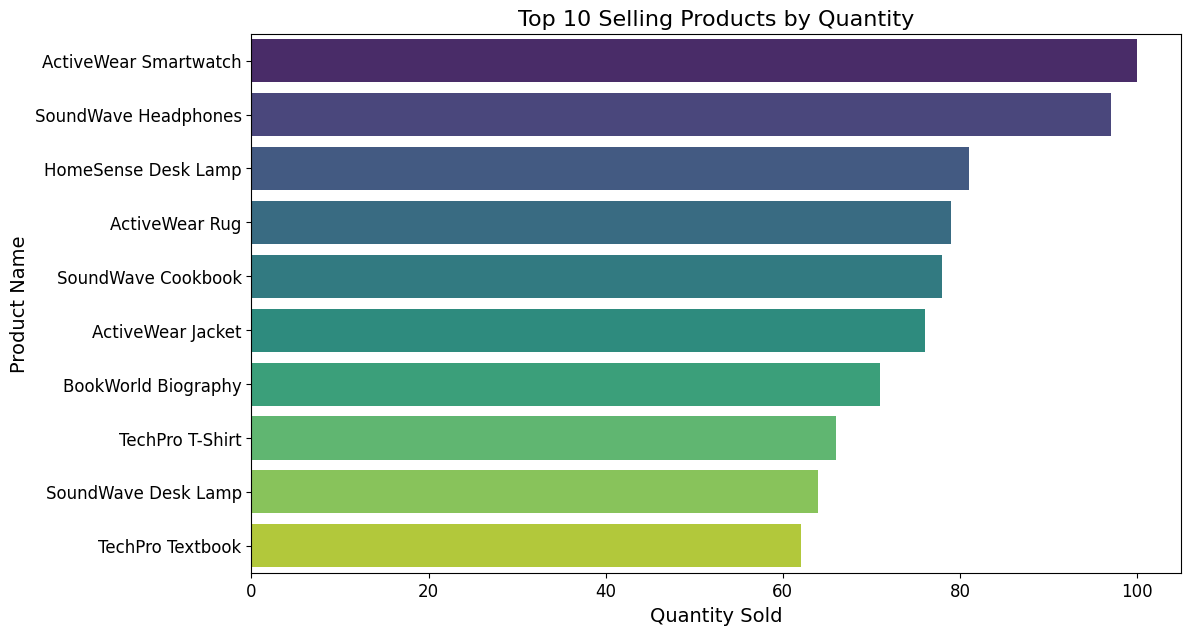

In [14]:
# Top 10 selling products by quantity
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#  Revenue Concentration in Categories

C:\Users\kvsth\AppData\Local\Temp\ipykernel_34692\1858133871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='coolwarm')


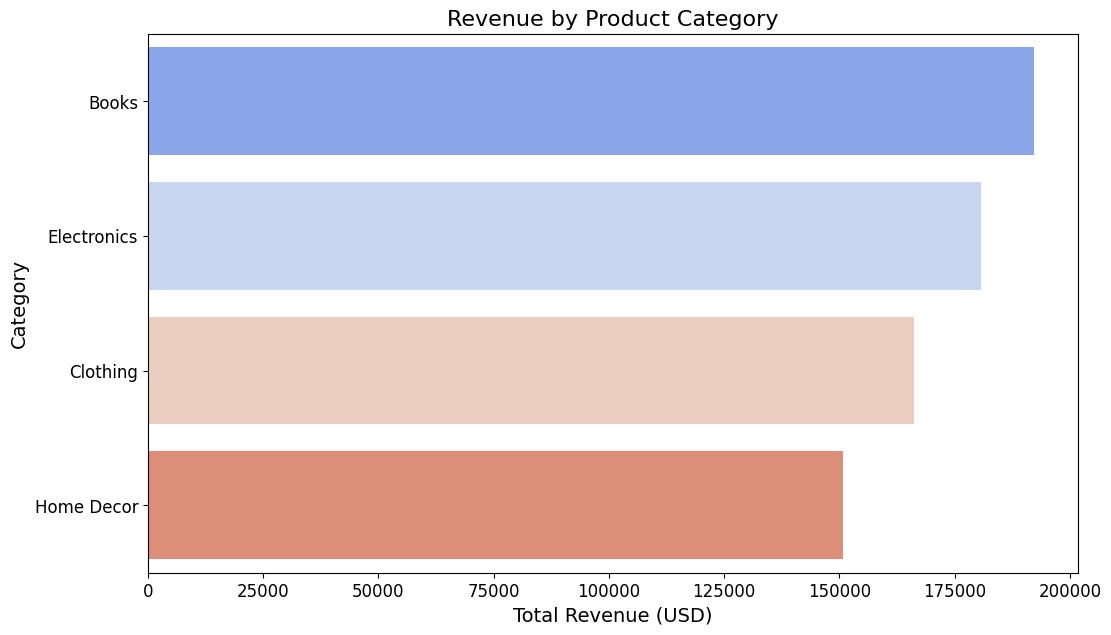

In [15]:
# Revenue by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='coolwarm')
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Total Revenue (USD)', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Regional Customer Trends

C:\Users\kvsth\AppData\Local\Temp\ipykernel_34692\4147165373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_customers.index, y=region_customers.values, palette='crest')


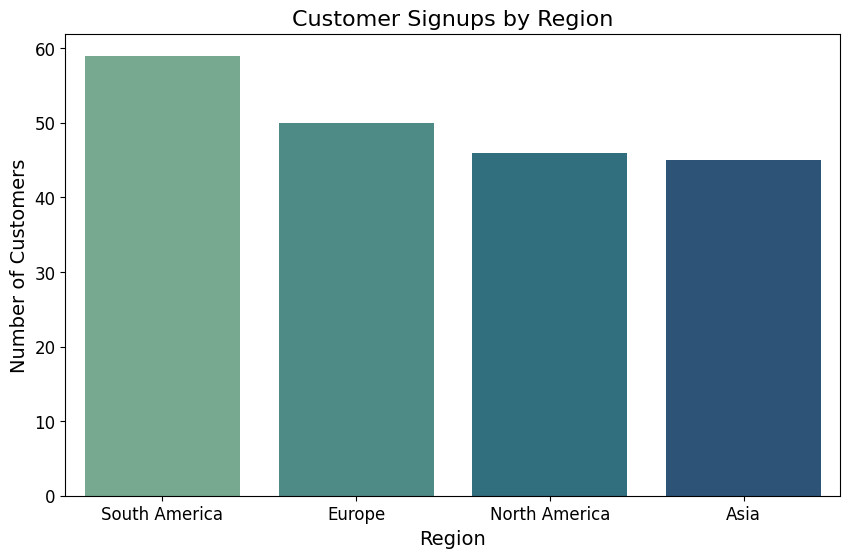

In [16]:
# Number of customers per region
region_customers = customers['Region'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=region_customers.index, y=region_customers.values, palette='crest')
plt.title('Customer Signups by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Seasonality in Transactions



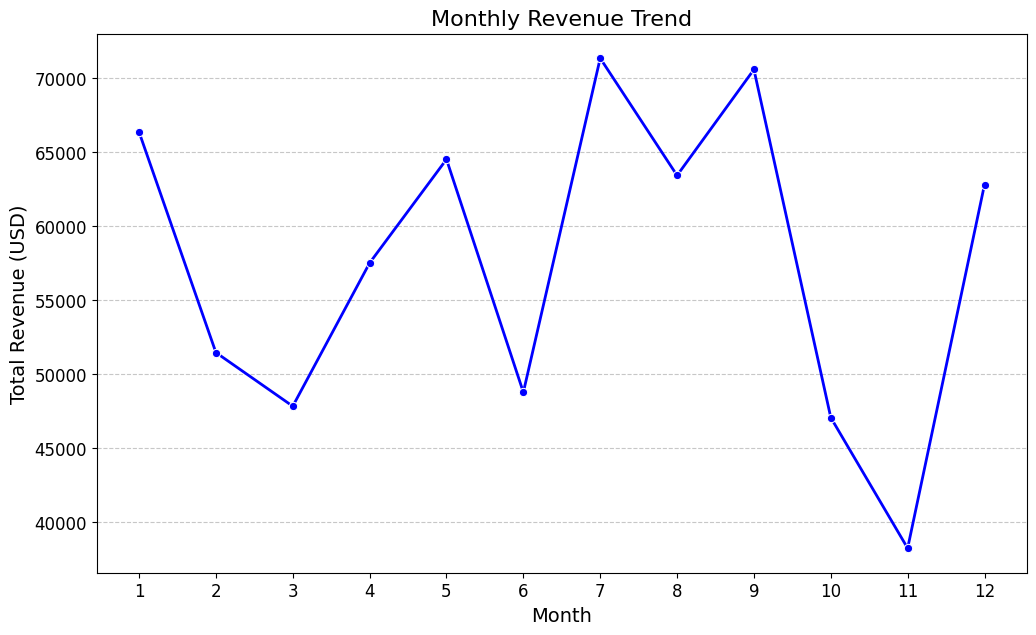

In [17]:
# Extract transaction month
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.month
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='blue', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#  Customer Engagement

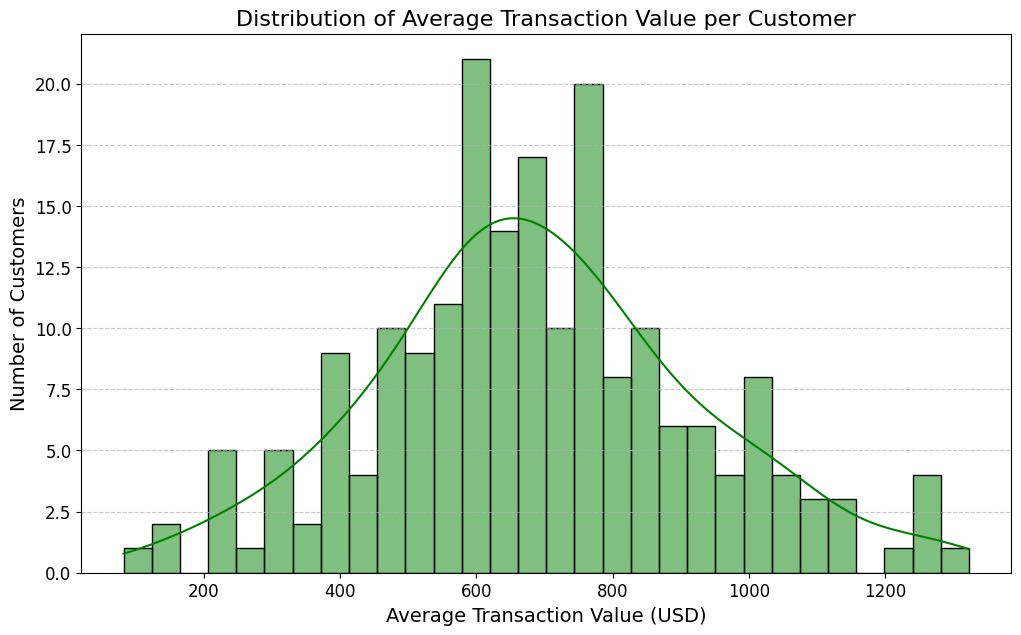

In [18]:
# Analyze average transaction value per customer
avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean()

# Plotting the distribution of average transaction values
plt.figure(figsize=(12, 7))
sns.histplot(avg_transaction_value, bins=30, kde=True, color='green')
plt.title('Distribution of Average Transaction Value per Customer', fontsize=16)
plt.xlabel('Average Transaction Value (USD)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()